In [14]:
import os
import numpy as np
import cv2
from src.tools import imgPeak, imgsPeak
from findpeaks import findpeaks
import src.seelib.cv2eff as cve 
import matplotlib.pyplot as plt
from src.loader import Sampler
from src.graph import Graph
from src.solver import graphSolver
from src.loader import poscarLoader

dataset = "../data/bulkexp"
modelname = "unet_tune_v1"
sampler = Sampler(dataset, modelname = modelname)

hup_layer = [10, 11, 12]
making = "st5"

findpeak_img = {
    "HDA3": 10,
    "HDA4": 7,
    "HDA5": 7,
    "HDA6": 6,
    "HDA7": 10,
    "HDA8": 10,
    "ss0": None,
    "exp91": None,
    "pls1": None,
    "pls2": None,
    "pls3": None,
    "pls4": 6,
    "pls5": None,
    "pls6": None,
    "pls7": None,
    "st1": None,
    "st2": None,
    "st3": None,
    "st4": None,
    "st5": None
}

pos_offset = {
    "HDA3": (-15,3),
    "HDA4": (-15,3),
    "HDA5": (-10,3),
    "HDA6": (-10,3),
    "HDA7": (-10,3),
    "HDA8": (-10,3),
    "ss0": (0, 0),
    "exp91": (0, 0),
}

#HDA_5 -10
# HDA_4 -15
# HDA_3 -15

HDA3 torch.Size([13, 1, 208, 208]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 40.0, 40.0)
('O', 'H')
1.0
(208, 208)
torch.Size([160, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(208, 208)
HDA4 torch.Size([10, 1, 300, 400]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 30.0, 40.0)
('O', 'H')
1.0
(300, 400)
torch.Size([119, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
HDA5 torch.Size([10, 1, 320, 430]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 32.0, 43.0)
('O', 'H')
1.0
(320, 430)
torch.Size([141, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(320, 430)
HDA6 torch.Size([8, 1, 380, 300]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 38.0, 30.0)
('O', 'H')
1.0
(380, 300)
torch.Size([114, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(380, 300)
HDA7 torch.Size([13, 1, 400, 400]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 40.0, 40.0)
('O', 'H')
1.0
(400, 400)
torch.Size([162, 3])
(400, 400)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


HDA8 torch.Size([13, 1, 550, 280]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 55.0, 28.0)
('O', 'H')
1.0
(550, 280)
torch.Size([154, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(550, 280)
ss0 torch.Size([14, 1, 472, 472]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 70.0, 70.0)
('O', 'H')
1.0
torch.Size([457, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(472, 472)
exp91 torch.Size([5, 1, 265, 226]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 47.0, 40.0)
('O', 'H')
1.0
torch.Size([201, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(265, 226)


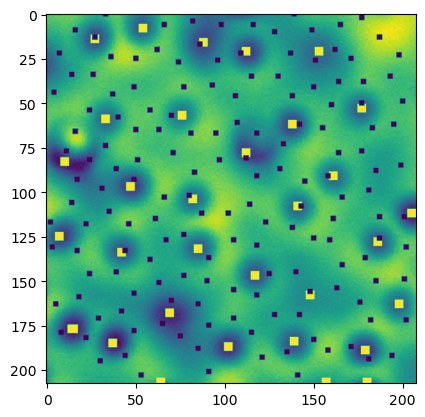

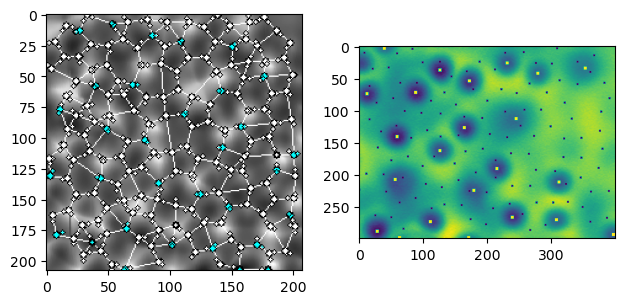

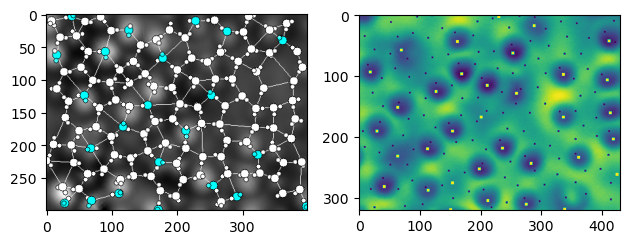

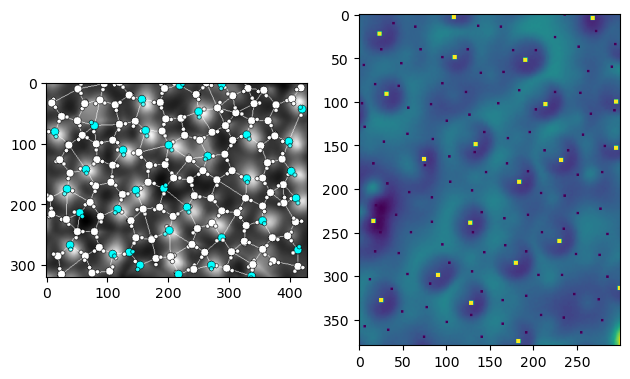

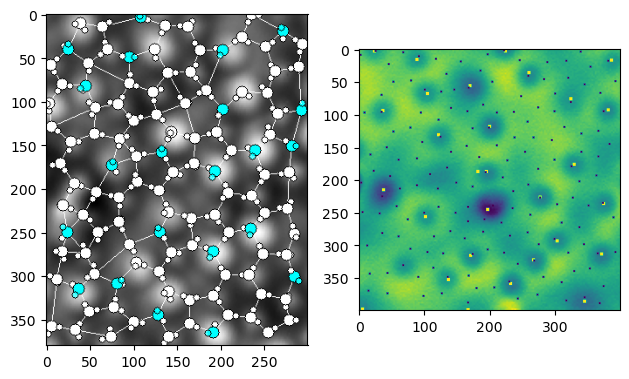

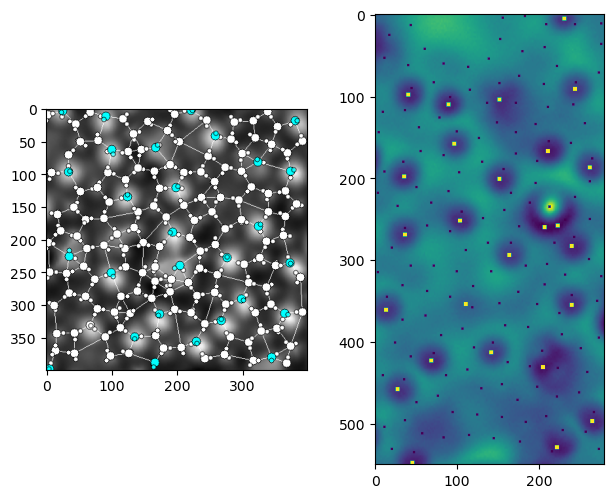

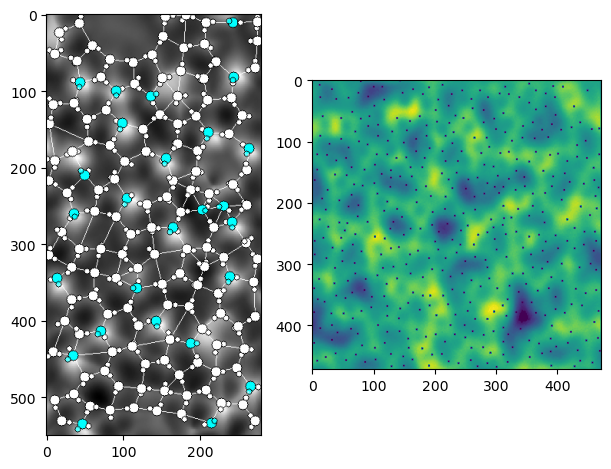

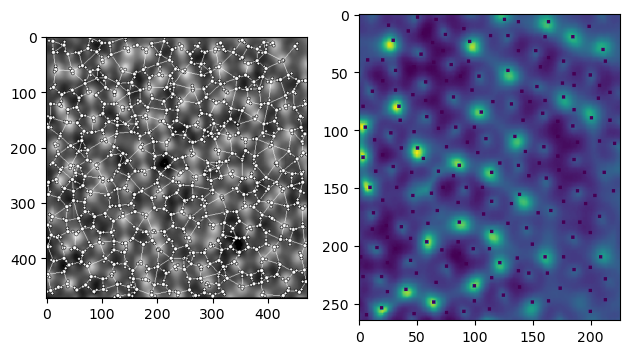

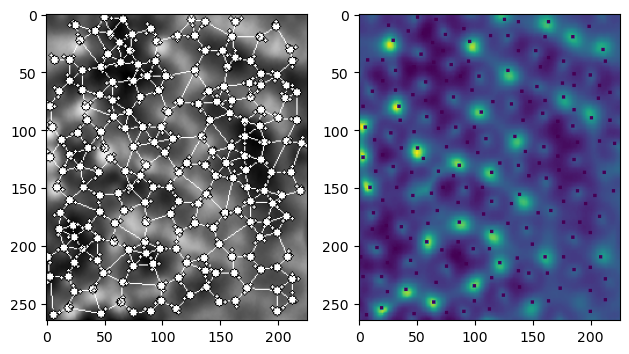

In [16]:
for making in findpeak_img:
    try:
        name, imgs, dic = sampler.get(making)
    except:
        continue
    making = name
    print(name, imgs.shape, dic.keys())
    print(dic['real_size'])
    print(dic['elem'])
    print(dic['scale'])
    imgs = imgs.squeeze(1).numpy()
    fp_img = findpeak_img[making]
    pos_offset = pos_offset[making] if making in pos_offset else (0, 0)
    
    # findpeaks
    if fp_img is not None:
        img = imgs[fp_img]
        print(img.shape)

        fp1 = findpeaks(method='topology', denoise='lee_enhanced',
                    window=9, limit=40, interpolate=5)

        fp2 = findpeaks(method='topology', denoise='fastnl',
                    window=3, limit=10, interpolate=10)

        fp3 = findpeaks(method='topology', denoise='fastnl',
                    window=5, limit=40, interpolate=10)

        fp4 = findpeaks(method='topology', denoise='fastnl',
                    window=7, limit=40, interpolate=10)

        pos = imgsPeak(img, [fp1, fp2, fp3, fp4], cluster_threshold= 10, inverse=True, border=2, show=False, flip= None) # y, x, c format
        pos = pos[...,(1,0,2)]
        pos[...,0] = pos[...,0] + pos_offset[0]
        pos[...,1] = pos[...,1] + pos_offset[1]
    else:
        pos = np.zeros((0, 3))
    
    
    # show points
    bg = imgs[-3].copy() * 255
    bg = cve.drawPoints(bg, pos[...,:2] / bg.shape, flip = None, size = 5)
    print(dic['pos']['O'].shape)
    # x y format
    bg = cve.drawPoints(bg, dic['pos']['O'][...,1:].numpy() / dic['real_size'][1:], color = (0,0,0), size = 3, flip = None)
    plt.imshow(bg)
    
    
    g = Graph(name, imgs, points_dict= dic['pos'], res = 1, real_size = dic['real_size'])
    g.detect_Hup(pos[...,:3])
    g.make_edges()
    gs = graphSolver(g)
    gs.solve()
    g.pp_all_nodes()
    out_img = g.plotEdges(3, transparency=0.5, text=False, mirror = False)
    out_img = g.plotNodes(out_img, reverse= True, mirror = False, text= False)
    
    
    # show images
    print(imgs[0].shape)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    cv2.imwrite("test.png", out_img)
    ax1.imshow(out_img)
    ax2.imshow(bg)
    plt.tight_layout()
    
    
    plt.savefig(f"{dataset}/combine/{modelname}/{making}.png")
    s, fix = g.wrtie_data()
    with open(f"{dataset}/combine/{modelname}/{making}.data", "w") as f:
        f.write(s)
    with open(f"{dataset}/combine/{modelname}/{making}.fix", "w") as f:
        f.write(" ".join(str(i) for i in fix))
    g.save(f"{dataset}/combine/{modelname}/{making}_fix.poscar")# 


        

for 

In [ ]:
name, imgs, dic = sampler.get(making)
print(name, imgs.shape, dic.keys())
print(dic['real_size'])
print(dic['elem'])
print(dic['scale'])
# print(dic['pos'])
imgs = imgs.squeeze(1).numpy()


st5 torch.Size([5, 1, 470, 470]) dict_keys(['real_size', 'elem', 'scale', 'pos'])
(3.0, 70.0, 70.0)
('O', 'H')
1.0


In [ ]:
fp_img = findpeak_img[making]
if fp_img is not None:
    img = imgs[fp_img]
    print(img.shape)

    # fp1 = findpeaks(method='topology', denoise='lee_enhanced',
    #                window=9, limit=40, interpolate=5)

    # fp2 = findpeaks(method='topology', denoise='fastnl',
    #                window=3, limit=10, interpolate=10)

    # fp3 = findpeaks(method='topology', denoise='fastnl',
    #                window=5, limit=40, interpolate=10)

    # fp4 = findpeaks(method='topology', denoise='fastnl',
    #                window=7, limit=40, interpolate=10)

    fp1 = findpeaks(method='topology', denoise='lee_enhanced',
                window=9, limit=40, interpolate=5)

    fp2 = findpeaks(method='topology', denoise='fastnl',
                window=3, limit=10, interpolate=10)

    fp3 = findpeaks(method='topology', denoise='fastnl',
                window=5, limit=40, interpolate=10)

    fp4 = findpeaks(method='topology', denoise='fastnl',
                window=7, limit=40, interpolate=10)

    pos = imgsPeak(img, [fp1, fp2, fp3, fp4], cluster_threshold= 10, inverse=True, border=2, show=True, flip= None) # y, x, c format
    pos = pos[...,(1,0,2)]
    pos[...,0] = pos[...,0] + pos_offset[0]
    pos[...,1] = pos[...,1] + pos_offset[1]
else:
    pos = np.zeros((0, 3))

torch.Size([527, 3])


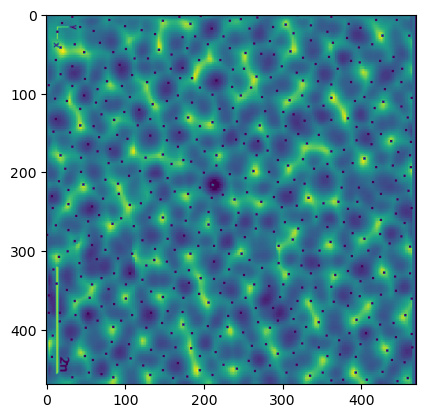

In [ ]:
bg = imgs[-3].copy() * 255
# print(dic['pos']['O'][...,1:].numpy()/dic['real_size'][1:], dic['real_size'], bg.shape)
bg = cve.drawPoints(bg, pos[...,:2] / bg.shape, flip = None, size = 5)
print(dic['pos']['O'].shape)
# x y format
bg = cve.drawPoints(bg, dic['pos']['O'][...,1:].numpy() / dic['real_size'][1:], color = (0,0,0), size = 3, flip = None)
plt.imshow(bg)

In [ ]:
g = Graph(name, imgs, points_dict= dic['pos'], res = 1, real_size = dic['real_size'])

In [ ]:
g.detect_Hup(pos[...,:3])
g.make_edges()

In [ ]:
gs = graphSolver(g)
gs.solve()

In [ ]:
g.pp_all_nodes()

In [ ]:
out_img = g.plotEdges(3, transparency=0.5, text=False, mirror = False)
out_img = g.plotNodes(out_img, reverse= True, mirror = False, text= False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(470, 470)


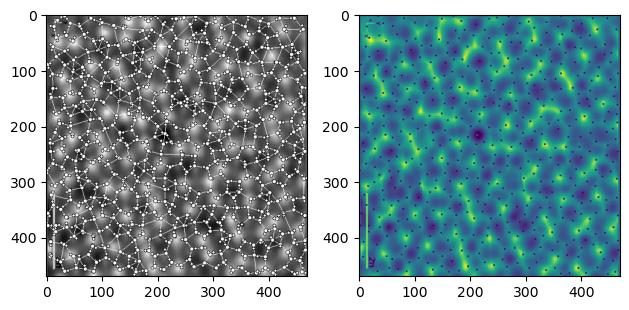

In [ ]:
print(imgs[0].shape)
fig, (ax1, ax2) = plt.subplots(1, 2)
cv2.imwrite("test.png", out_img)
ax1.imshow(out_img)
ax2.imshow(bg)
plt.tight_layout()
plt.savefig(f"{dataset}/combine/{modelname}/{making}.png")


In [ ]:
s, fix = g.wrtie_data()

In [ ]:
with open(f"{dataset}/combine/{modelname}/{making}.data", "w") as f:
    f.write(s)
with open(f"{dataset}/combine/{modelname}/{making}.fix", "w") as f:
    f.write(" ".join(str(i) for i in fix))
g.save(f"{dataset}/combine/{modelname}/{making}_fix.poscar")# 
